# The Office Scratchpad

In [4]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acquire

In [5]:
# functions to set data to be used in my visualizations 
def set_color(ratings):
    if ratings < 7.4:
        return 'red'
    elif (ratings >= 7.4) & (ratings < 8.2):
        return 'yellow'
    elif (ratings >= 8.2) & (ratings < 9.0):
        return 'lightgreen'
    elif (ratings >= 9.0):
        return 'darkgreen'

In [6]:
def the_office():
    '''
    Function to read the office series csv file,
    and drop null values in the data,
    rename columns for readability,
    convert column names to lowercase
    and save the new df to a csv file
    '''
    # reading the office series data from a csv file
    df = pd.read_csv('the_office_series.csv')
    # dropping the GuestStars column, too many null values
    df = df.drop(columns='GuestStars')
    # renaming the columns for readability
    df = df.rename(columns={"Unnamed: 0": "Episode", "EpisodeTitle": "Episode_Title"})
    # convert column names to lowercase
    df.columns = [col.lower() for col in df]
    # adding a color column to the df
    df['color'] = df['ratings'].apply(set_color)
    # saving the office data to a csv
    df.to_csv('the_office.csv')
    
    return df

In [7]:
# getting the office data using the office function 
df = the_office()
df.head()

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


In [ ]:
# reading the office series csv file
df = pd.read_csv('the_office_series.csv')
df.head() # check_yo_head

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   episode        188 non-null    int64  
 1   season         188 non-null    int64  
 2   episode_title  188 non-null    object 
 3   about          188 non-null    object 
 4   ratings        188 non-null    float64
 5   votes          188 non-null    int64  
 6   viewership     188 non-null    float64
 7   duration       188 non-null    int64  
 8   date           188 non-null    object 
 9   director       188 non-null    object 
 10  writers        188 non-null    object 
 11  color          188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

In [ ]:
df.head()

In [9]:
# looking at the shape of the data
df.shape

(188, 12)

In [10]:
# looking at the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   episode        188 non-null    int64  
 1   season         188 non-null    int64  
 2   episode_title  188 non-null    object 
 3   about          188 non-null    object 
 4   ratings        188 non-null    float64
 5   votes          188 non-null    int64  
 6   viewership     188 non-null    float64
 7   duration       188 non-null    int64  
 8   date           188 non-null    object 
 9   director       188 non-null    object 
 10  writers        188 non-null    object 
 11  color          188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [11]:
# checking for nulls in the data
df.isna().sum()

episode          0
season           0
episode_title    0
about            0
ratings          0
votes            0
viewership       0
duration         0
date             0
director         0
writers          0
color            0
dtype: int64

It looks like there are only nulls in the Gueststar column,
I think I will make a gueststar df and then drop it for the original df

In [12]:
def guest_office():
    '''
    Function to create a df where there are guest stars on the episode,
    drop the null values in the data,
    rename columns for readability,
    convert column names to lowercase
    and save the df to a csv file 
    '''
    # reading the office series data from a csv file
    df = pd.read_csv('the_office_series.csv')
    # dropping the null values in the GuestStars column
    df = df[df.GuestStars.notna()]
    # renaming the columns for readability
    df = df.rename(columns={"Unnamed: 0": "Episode", "EpisodeTitle": "Episode_Title", "GuestStars": "Guest_Stars"})
    # convert column names to lowercase
    df.columns = [col.lower() for col in df]
    # adding a color column to the df
    df['color'] = df['ratings'].apply(set_color)
    # saving the office data to a csv
    df.to_csv('the_office_guest.csv')
    
    return df
    

In [13]:
guest_df = guest_office()
guest_df.head()

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,guest_stars,director,writers,color
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,yellow
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur,lightgreen
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak,lightgreen
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein,lightgreen
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta,lightgreen


In [14]:
guest_df.shape

(29, 13)

In [ ]:
df.head()

In [ ]:
df = df.drop(columns='GuestStars')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# convert column names to lowercase, replace '.' in column names with '_'
df = df.columns = [col.lower().replace('.', '_') for col in df]

In [15]:
# looking at the episode with the most views
max_views = df.loc[df.viewership.idxmax()]
max_views

episode                                                         77
season                                                           5
episode_title                                        Stress Relief
about            Dwight's too-realistic fire alarm gives Stanle...
ratings                                                        9.7
votes                                                         8170
viewership                                                   22.91
duration                                                        60
date                                               1 February 2009
director                                             Jeffrey Blitz
writers                                           Paul Lieberstein
color                                                    darkgreen
Name: 77, dtype: object

In [16]:
# checking to see the most viewed episode on the guest df, looks like they are the same
guest_max = guest_df.loc[guest_df.viewership.idxmax()]
guest_max

episode                                                         77
season                                                           5
episode_title                                        Stress Relief
about            Dwight's too-realistic fire alarm gives Stanle...
ratings                                                        9.7
votes                                                         8170
viewership                                                   22.91
duration                                                        60
date                                               1 February 2009
guest_stars              Cloris Leachman, Jack Black, Jessica Alba
director                                             Jeffrey Blitz
writers                                           Paul Lieberstein
color                                                    darkgreen
Name: 77, dtype: object

Text(0.5, 1.0, 'Episode Popularity of The Office')

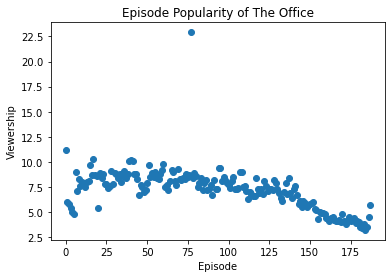

In [17]:
plt.scatter(df.episode, df.viewership)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   episode        188 non-null    int64  
 1   season         188 non-null    int64  
 2   episode_title  188 non-null    object 
 3   about          188 non-null    object 
 4   ratings        188 non-null    float64
 5   votes          188 non-null    int64  
 6   viewership     188 non-null    float64
 7   duration       188 non-null    int64  
 8   date           188 non-null    object 
 9   director       188 non-null    object 
 10  writers        188 non-null    object 
 11  color          188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [19]:
df.describe()

,episode,season,ratings,votes,viewership,duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


In [20]:
# functions to set data to be used in my visualizations 
def set_color(ratings):
    if ratings < 7.4:
        return 'red'
    elif (ratings >= 7.4) & (ratings < 8.2):
        return 'yellow'
    elif (ratings >= 8.2) & (ratings < 9.0):
        return 'lightgreen'
    elif (ratings >= 9.0):
        return 'darkgreen'

In [ ]:
# setting data required in visualizations
df['color'] = df['ratings'].apply(set_color)
df.head()

Text(0.5, 1.0, 'Episode Popularity of The Office')

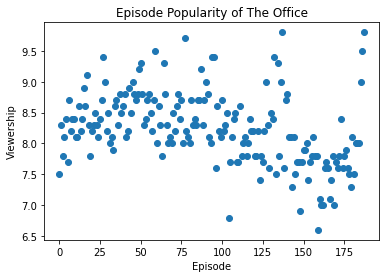

In [21]:
plt.scatter(df.episode, df.ratings)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")

Text(0.5, 1.0, 'Episode Popularity of The Office')

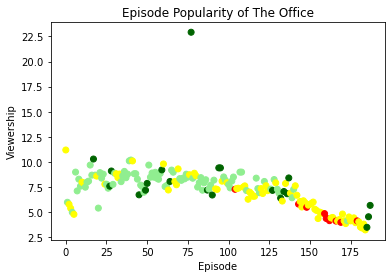

In [22]:
fig, ax = plt.subplots()

ax.scatter(x=df.index, 
           y=df.viewership,
           c=df.color,
          )
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Popularity of The Office")